# Logistic Regression 구현

In [1]:
import math, random
from functools import partial,reduce
from assignment2 import *
import pandas as pd
from sklearn.model_selection import train_test_split

data 설명

1. Label: 유료 계정 등록 여부(target)
2. bias: 회귀 모형에서의 상수항을 위한 term (추정 시 포함하지 않아도 ok)
3. experience: 근속연수
4. salary: 연봉


어떤 사용자가 유료 계정을 등록할지(Label == 1)에 대한 예측을 로지스틱 회귀 모형으로 진행합니다.

In [2]:
data = pd.read_csv('assignment_2.csv')

In [4]:
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


### 0. Gradient Descent

In [5]:
def step(v, direction, step_size):
    """
    한 지점에서 step size만큼 이동하는 step 함수를 구현하세요.
    v와 direction은 벡터.
    """
    
    v2 = []
    for v_i, d_i in zip(v,direction):
        v2.append(v_i + step_size * d_i)
    
    return v2

* v(i+1) = v(i) + (learning rate) * direction 
* v가 벡터이므로 각각의 인자를 받아 list 값으로 반환한다. 

In [6]:
def safe(f) :
    """
    f에 대한 예외처리를 위한 함수(f가 infinite일 때)
    """
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

In [7]:
def minimize_bgd(target_fn, gradient_fn, theta_0, tolerance = 0.00001): # bgd: batch gradient descent
    """
    목적함수를 최소화시키는 theta를 경사 하강법을 사용해서 찾는다.
    """
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    
    # 시작점 설정
    theta = theta_0
    target_fn = safe(target_fn) # 오류를 처리할 수 있는 target_fn으로 변환
    value = target_fn(theta) # 최소화시키려는 값
    
    while True:
        gradient = gradient_fn(theta) # gradient값 계산
        next_thetas = [step(theta, gradient, i) for i in step_sizes] #### update thetas --> 각 step sizes에 따른 theta값을 list형태로 리턴
        
        # 함수를 최소화시키는 theta 선택
        obj = next_thetas # 어떤 값
        key = target_fn # 목적함수 
        next_theta = min(obj, key = key) # key가 함수, obj 함수 안에 들어가는 값 
        next_value = target_fn(next_theta)
        
        # tolerance만큼 수렴하면 멈춤
        temp = abs(value - next_value) # temp 채워넣기
        if temp < tolerance:
            return theta
        else: #### 어떻게 업데이트 시킬지 채워넣으세요
            theta = next_theta
            value = next_value
        

* target_fn: 목적함수, gradient_fn: 그래디언트 함수, theta_0: theta 초기값 
* gradient = gradient_fn(theta): theta일 때의 gradient position 
* next_thetas : 다음 지점으로 이동하기 위해 구현한 함수
* [step(theta, graidient, i) for i in step_sizes] = theta + i(step_sizes에 있는 learning rate 값) * gradient (direction) 

<br>

* min(obj, key=key): key 함수에서, obj 값이 key 함수에 들어가는 값이다. 이 때의 min 값이 next_theta 
* obj에서 next_thetas 안의 값들을 고려하고, 이를 통해 target_fn에 next_theta 값을 넣어 next_value 값을 찾는다. 

<br> 

* tolerance: value와 next_value 차이값이 매우 매우 작아진다면, minima 값 근처에서 거의 수렴하고 있는 형태를 띄고 있다는 것을 의미한다 
* 따라서 temp가 tolerance보다 작다면, 더 이상 다음 값을 찾을 필요가 없으므로, 즉 수렴했다고 생각하면 되므로 theta 값을 반환한다 
* temp가 tolerance 보다 여전히 큰 값이라면, minima 값을 찾아 갈 만한 여지가 남았다는 의미이므로 next_theta, next_value 값으로 그 다음 값을 찾는다 


In [ ]:
def stochastic():
    """
    sgd 구현 (추가적인 부분이니 필수는 아닙니다.)
    random sampling 하는 부분(함수로 따로 구현하셔도 ok) + gd 부분
    """

### 1. 로지스틱 함수
해당 함수는 1/(1+exp[-(ax+b)])로 표현되었음을 기억합시다.

In [8]:
def logistic(x):
    return 1.0 / (1 + math.exp(-x))

* 로지스틱 함수: 해당 값에서의 확률

In [9]:
def softmax(v):
    """
    softmax 구현
    """
    sum_v = sum([math.exp(v_i) for v_i in v])
    return [math.exp(v_i)/sum_v for v_i in v]

* softmax: 값의 출력, 로지스틱 함수를 통해 식을 구현하여 출력값들의 총합이 1이 되게끔 구현 

### 2. Likelihood 구현
그냥 Likelihood function 대신, log likelihood function을 이용해서 구현하세요.

In [10]:
def logistic_log_likelihood_i(x_i, y_i, beta): # 개별 데이터포인트에 대한 likelihood
    """
    해당 함수에 대한 설명을 작성하고,
    리턴문을 채우세요.
    """
    if y_i == 1:
        return math.log(logistic(dot(x_i, beta)))
    else:
        return math.log(1 - logistic(dot(x_i, beta))+1e-10)

In [11]:
def logistic_log_likelihood(x, y, beta): # 전체 데이터에 대한 likelihood
    """
    함수의 인자를 채워넣고,
    zip 함수를 이용하여 return 문을 완성하세요.
    """
    
    loglikelihood = 0.0
    for x_i, y_i in zip(x, y):
        loglikelihood += logistic_log_likelihood_i(x_i, y_i, beta)
    
    return loglikelihood

* **logistic_log_likelihood_i**   
개별 데이터포인트에 대한 likelihood  
yi* log(f) + (1-yi)* log(1-f) (yi = 0 or 1)  


* **logistic_log_likelihood**  
전체 데이터에 대한 likelihood = 개별 데이터포인트에 대한 likelihood 값의 합   
likelihood의 경우 개별 값의 곱으로 구현되는데, 여기서는 log를 취해 주었으므로 합을 구하면 됨 
* (추가) 여기서의 logistic_log_likelihood는 위로 볼록한 형태의 함수  
  쉽게 생각하면 y=x(1-x) 그래프 형태이므로 -> 미분값=0 이 되는 값에서 최댓값이 도출됨 

### 3. Gradient for Log Reg
아래 3가지 함수에 대해 해당 함수의 인자와 기능을 자세히 설명하세요.

In [12]:
def logistic_log_partial_ij(x_i, y_i, beta, j): # 편미분 
    return (y_i - logistic(dot(x_i, beta))) * x_i[j]

def logistic_log_gradient_i(x_i, y_i, beta):
    return [logistic_log_partial_ij(x_i, y_i, beta, j) for j, _ in enumerate(beta)]

def logistic_log_gradient(x, y, beta):
    return reduce(vector_add, [logistic_log_gradient_i(x_i, y_i, beta) for x_i, y_i in zip(x,y)])

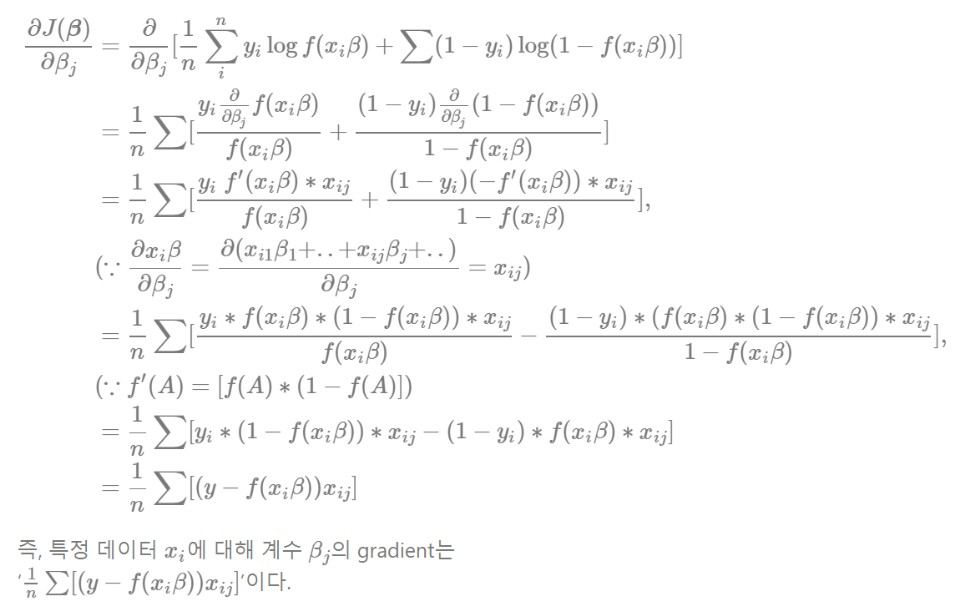

* i: 샘플의 개수, j: 피쳐의 개수
* J(theta) = logistic regression의 cost function 


* cost function의 최솟값을 찾기 위해서 이러한 과정을 수행한다.   
-> 왜? gradient descent 알고리즘의 **gradient**를 구하기 위해서 

**gradient**: 함수를 구성하는 각 변수에 대한 일차 편미분값으로 구성되는 벡터.

1. **logistic_log_partial_ij**  
    하나의 변수에 대한 i(행), j(열)의 gradient를 구하기 위해서 편미분 한 것 


2. **logistic_log_gradient_i**  
    모든 변수에 대해서 gradient를 구하기 위해 합쳐준 것  
    각각의 피쳐에 대해 (j에 대해) gradient를 구하고 -> 이것을 열로 합쳐준 것을 본 것 


3. **logistic_log_gradient**  
    행을 다 합쳐준 것을 본 것 (전체 데이터셋 본 것)

### 4. Model Fitting
위에서 구현한 log likelihood를 이용하여 Model을 Fitting 시켜보세요.  
앞서 우리는 log likelihood를 maximize하는 방향으로 회귀계수를 추정한다고 배웠습니다.  
Gradient Descent는 경사 "하강법"으로 최솟값을 찾는 데에 사용되는 알고리즘입니다.  
따라서 log likelihood를 적절히 변형을 해야 Gradient Descent 코드를 적용할 수 있습니다.  
log likelihood 변형 함수는 assignment2.py에 구현되어있으니, None값만 채워주시면 됩니다.

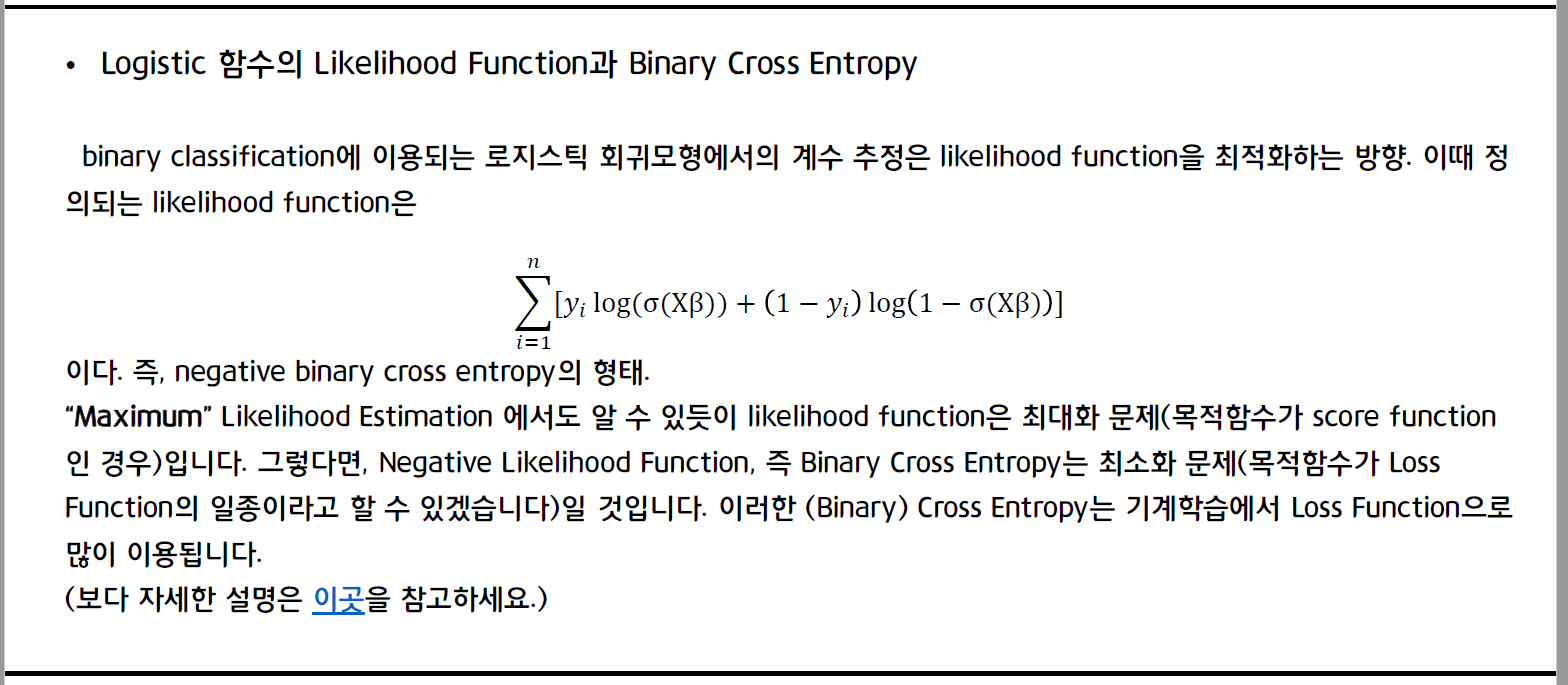  
https://curt-park.github.io/2018-09-19/loss-cross-entropy/

In [13]:
data

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000
...,...,...,...,...
195,0,1,6.5,84000
196,0,1,6.9,73000
197,0,1,5.1,72000
198,1,1,9.1,69000


In [14]:
X = data.drop('Label', axis = 1)
y = data['Label']

In [15]:
from sklearn.model_selection import train_test_split
import random

In [17]:
random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [18]:
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()
y_train = y_train.as_matrix()
y_test = y_test.as_matrix()

C:\Users\LG\venv\jbeen\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\LG\venv\jbeen\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\LG\venv\jbeen\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\LG\venv\jbeen\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[ 0.        , -1.05392432, -1.08449023],
       [ 0.        ,  0.44580782,  0.63432448],
       [ 0.        , -0.9468006 , -0.28646912],
       [ 0.        ,  0.98142645,  0.75709695],
       [ 0.        ,  0.08872874, -0.28646912],
       [ 0.        , -0.33976616, -0.47062784],
       [ 0.        , -1.16104805, -1.51419391],
       [ 0.        ,  0.51722364,  0.81848319],
       [ 0.        ,  1.05284226,  0.38877952],
       [ 0.        , -1.4110034 , -1.39142143],
       [ 0.        ,  0.01731293,  0.511552  ],
       [ 0.        ,  0.48151573,  0.38877952],
       [ 0.        , -1.55383504, -2.18944254],
       [ 0.        , -1.19675595, -0.1023104 ],
       [ 0.        ,  1.73129252, -0.96171775],
       [ 0.        , -1.4110034 , -0.71617279],
       [ 0.        , -1.19675595, -0.34785536],
       [ 0.        , -0.83967687, -0.65478655],
       [ 0.        ,  0.58863946,  0.75709695],
       [ 0.        ,  0.16014456, -0.22508288],
       [ 0.        , -0.01839498,  0.450

In [21]:
# 아래에 Model Fitting 진행
from functools import partial # partial을 이용해 fn과 gradient_fn 구현

fn = neg(partial(logistic_log_likelihood, X_train, y_train))
gradient_fn = neg_all(partial(logistic_log_gradient, X_train, y_train))

beta_0 = [random.random() for _ in range(3)] # 임의의 시작점

# 경사 하강법으로 최적화
beta_hat = minimize_bgd(fn, gradient_fn, beta_0)

* partial: 함수 속에 들어갈 인자를 미리 지정해 주는 파이썬 내장함수  
   
   
* fn: 목적함수 = log likelihood
    - logistic log likelihood 함수에 X_train, y_train 인자를 넣었을 때  
      log likelihood 값 찾는 것.
    - 위에서 구현한 likelihood 함수의 경우 최댓값을 찾는 함수 (위로 볼록한 형태)   
      -> 경사 하강법은 기울기가 가장 가파른 곳을 찾아 "내려가는" 알고리즘   
      -> 우리는 "최솟값"을 찾아야 함  
      -> 따라서 negative를 취해줌으로써 fn을 음수 형태로 바꿔주고   
         최솟값을 찾는 형태로 바꿔주는 것 


* gradient_fn: 최적 그래디언트 값   
    - logistic log gradient 함수에 X_train, y_train 인자를 넣었을 때   
      최적의 gradient 값을 찾는 것
    - fn의 값이 음수가 되었으므로 gradient_fn 값도 음수 형태로 바꾸어 줘야 함 


* beta_hat = beta_0 - fn * gradient_fn 
   - 로지스틱 회귀 모형의 "회귀 계수" 
   - 임의의 시작점에서 목적함수, 최적 그래디언트 값을 고려하여   
     최적의 회귀 계수를 찾는 것 
   - gradient descent를 통해 찾은 최적 회귀 계수(Beta_hat) 값으로 향후 로지스틱 회귀모형에 피팅하게 될 것 